<a href="https://colab.research.google.com/github/sergioperes20/Analytics-Projects-/blob/main/Cyber_Attack_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [ ]:
file_path = "Cyber Attacks.xlsx"

cyber_file = pd.read_excel(file_path)

print(cyber_file.describe())

       organisation size        revenue  ransom cost   YEAR code         YEAR  \
count         612.000000     573.000000   219.000000  612.000000   611.000000   
mean           25.661765   10882.875159    32.438581    2.555556  2019.396072   
std            49.512137   34588.141044    88.511469    1.549569     1.673394   
min             1.000000       0.100000     0.002500    1.000000  2013.000000   
25%             5.000000      27.500000     0.457000    1.000000  2019.000000   
50%            10.000000     788.000000     4.500000    2.000000  2020.000000   
75%            25.000000    4328.700000    20.000000    3.000000  2021.000000   
max           300.000000  399000.000000   670.000000    6.000000  2021.000000   

       interesting story (edited)  Source Name         #ID  
count                         0.0          0.0  612.000000  
mean                          NaN          NaN  158.254902  
std                           NaN          NaN   96.046261  
min                       

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

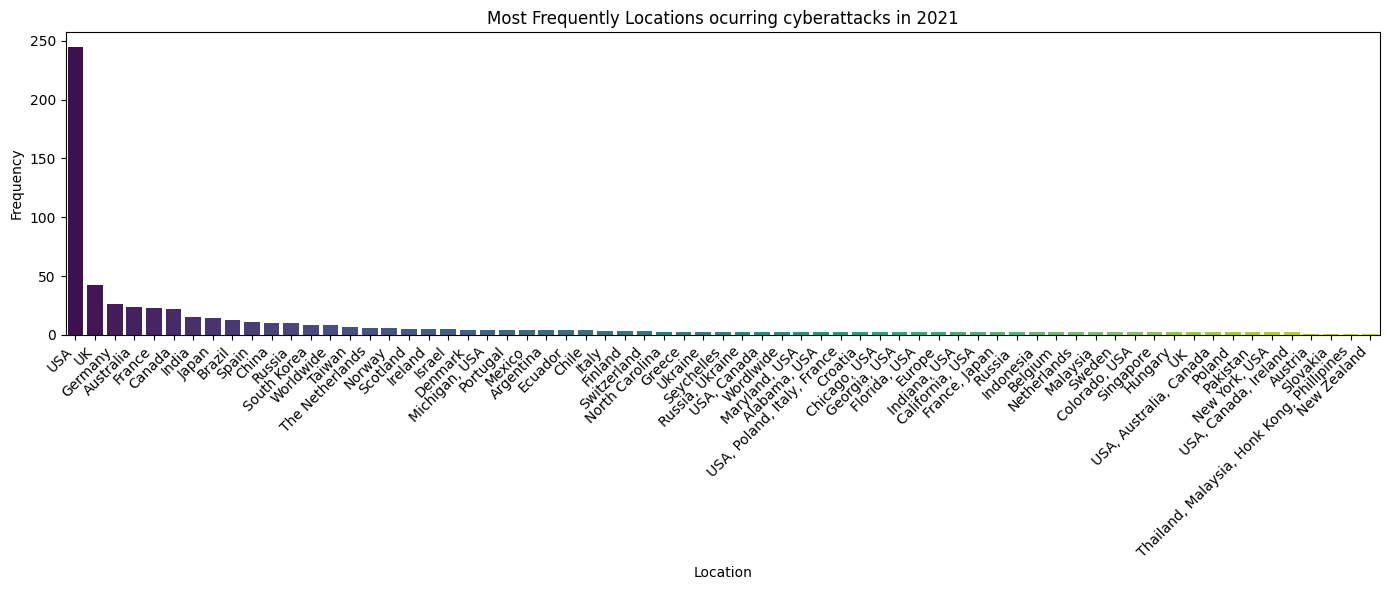

In [ ]:
cyber_attacks_2021 =cyber_file[cyber_file['YEAR'] == 2021]
location_counts = cyber_file['location'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Most Frequently Locations ocurring cyberattacks in 2021')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Number of cyber attacks by sector

government             103
tech                    98
healthcare              87
academic                57
logistics               34
finance                 32
energy                  28
transport               26
retail                  22
media & sports          18
food & beverage         17
mixed                   16
legal                   13
misc                    12
automotive              10
telecomms                8
gaming                   7
telecoms                 6
military                 4
finace                   2
logistics, telecoms      2
healthcare, tech         1
tech                     1
media                    1
Name: sector, dtype: int64


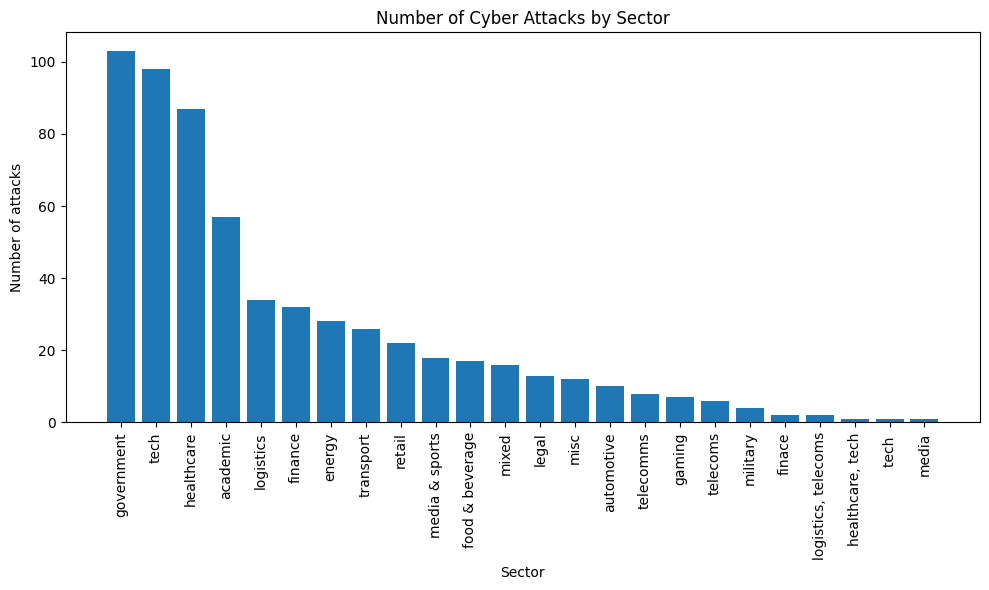

In [ ]:
#Sectors majorly targeted
sector_counts = cyber_file['sector'].value_counts()

print("Number of cyber attacks by sector\n")
print(sector_counts)

#visualization
plt.figure(figsize=(10,6))
plt.bar(sector_counts.index,sector_counts.values)
plt.xlabel('Sector')
plt.ylabel('Number of attacks')
plt.title('Number of Cyber Attacks by Sector')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Data - Number of Cyber Attacks Per Year:
2013.0      2
2014.0      6
2015.0     10
2016.0     18
2017.0     82
2018.0     30
2019.0     56
2020.0    242
2021.0    165
Name: YEAR, dtype: int64


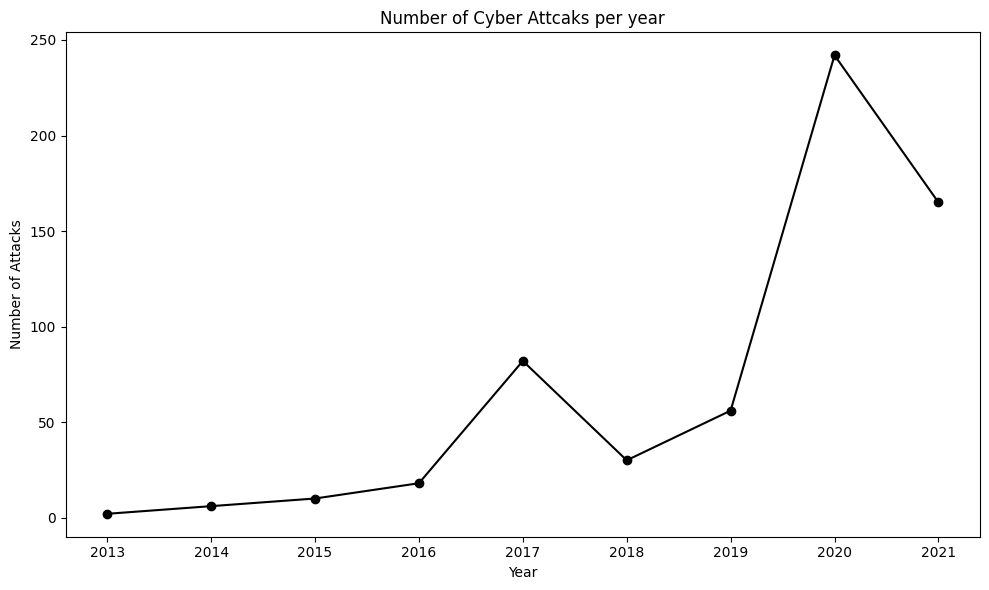

In [ ]:
#Number of Cyber attacks per year
cyber_file['YEAR'] = pd.to_datetime(cyber_file['YEAR'],format = "%Y",errors='coerce')
cyber_file['YEAR'] = cyber_file['YEAR'].dt.year
cyber_file.dropna(subset=['YEAR'],inplace=True)
attacks_per_year = cyber_file['YEAR'].value_counts().sort_index()

print("Data - Number of Cyber Attacks Per Year:")
print(attacks_per_year)

#Visualisation - line chart
plt.figure(figsize=(10,6))
plt.plot(attacks_per_year.index,attacks_per_year.values,marker='o',linestyle='-',color='black')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Cyber Attcaks per year')

plt.tight_layout()

plt.show()

Most Frequent Ransomwares used for Cyber Attacks

WannaCry               58
REvil                  45
Ryuk                   35
DoppelPaymer           28
Maze                   26
NotPetya               22
Clop                   14
RansomEXX              14
SamSam                 12
NetWalker              12
Ragnar Locker          11
Egregor                11
Conti                  11
DarkSide                9
Nefilim                 8
CryptoWall              8
Netwalker               4
Hotarus Corp            4
Erkan                   2
Pay2Key                 2
MountLocker             2
RansomExx               2
WastedLocker            2
LockBit                 2
Defray                  2
Darkside                2
TA505                   2
TrickBot, Ryuk          2
RobbinHood              2
Shadow Kill Hackers     2
NotPetya & Petya        2
BadRabbit               2
HDDCryptor              2
Armada Collective       2
TeslaCrypt              2
EvilCorp                2
Phoenix Locker

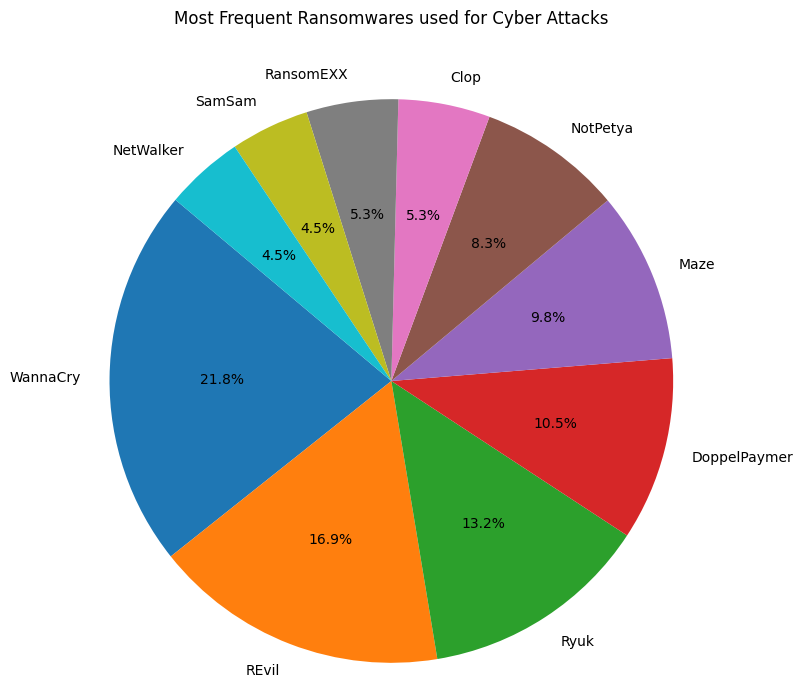

In [ ]:
#most used ransomwares to attacks
filtered_ransomware = cyber_file[(cyber_file['Ransomware']!='unknown') & (cyber_file['Ransomware']!='Not revealed')]
ransomware_counts = filtered_ransomware['Ransomware'].value_counts()
print('Most Frequent Ransomwares used for Cyber Attacks\n')
print(ransomware_counts)

#visualization
ransomware_counts = ransomware_counts.head(10)
plt.figure(figsize=(8,8))
plt.pie(ransomware_counts,labels=ransomware_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Frequent Ransomwares used for Cyber Attacks\n\n')
plt.axis('equal')

plt.show()

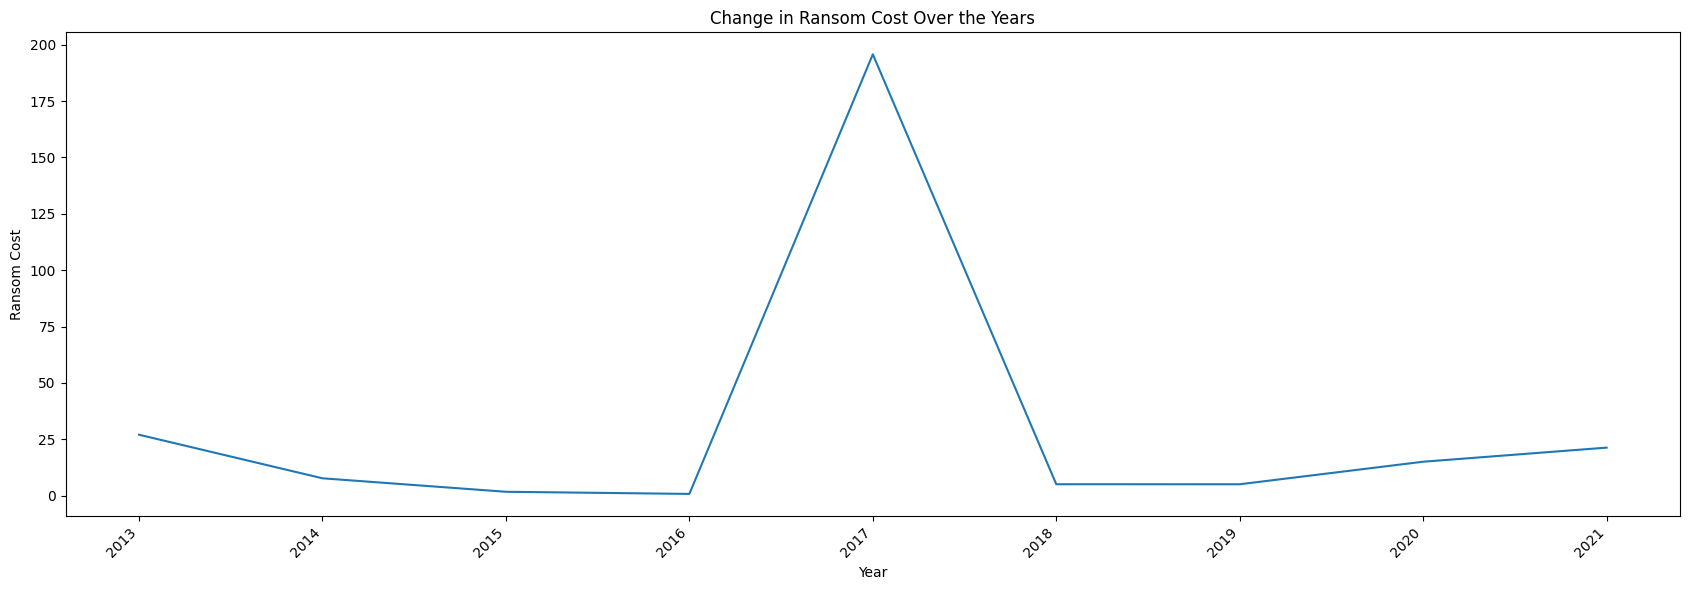

In [ ]:
plt.figure(figsize=(17, 6))
sns.lineplot(data=cyber_file, x='YEAR', y='ransom cost', estimator='mean', err_style=None)
plt.xlabel('Year')
plt.ylabel('Ransom Cost')
plt.title('Change in Ransom Cost Over the Years')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

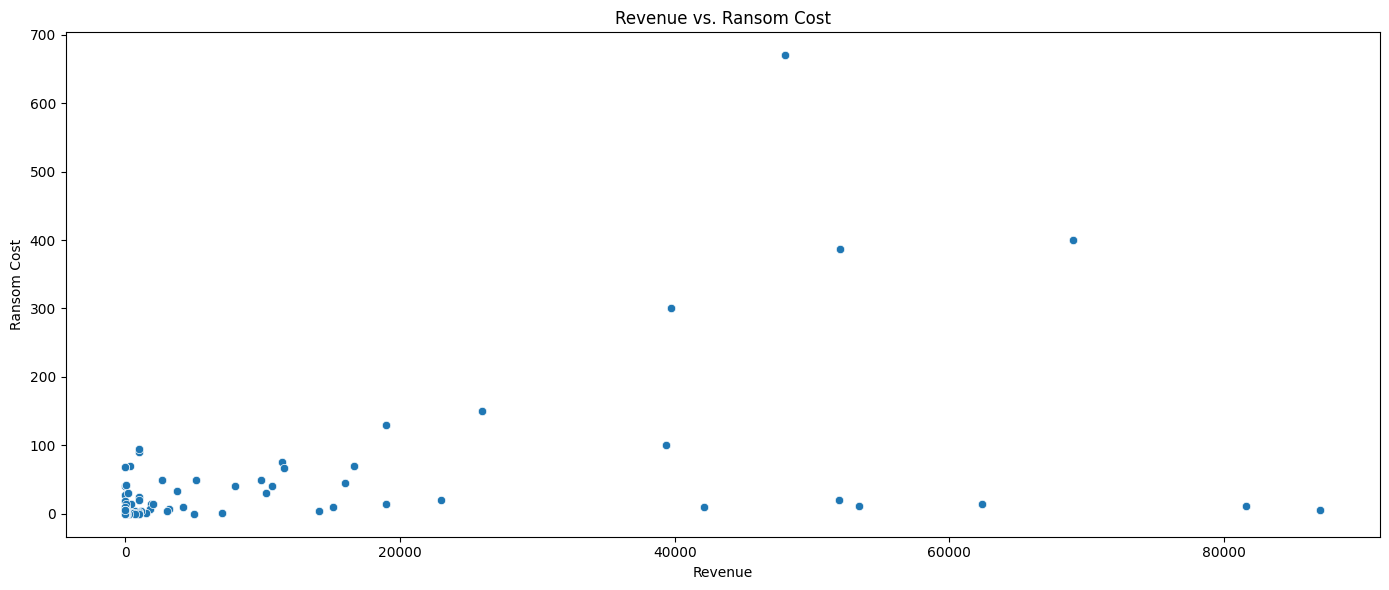

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=cyber_file, x='revenue', y='ransom cost')
plt.xlabel('Revenue')
plt.ylabel('Ransom Cost')
plt.title('Revenue vs. Ransom Cost')

plt.tight_layout()
plt.show()